# Task 1: Preprocess and Explore the Data

In this notebook, we will work with historical stock data for TSLA, BND, and SPY from Yahoo Finance. The main tasks will include:
- Loading and cleaning the data.
- Exploratory Data Analysis (EDA), including visualizations.
- Analyzing volatility and trends using various statistical methods.
- Decomposing the time series into its trend, seasonal, and residual components.

By the end of this notebook, we will have a deeper understanding of the data and its potential for predictive modeling.

## Import Necessary Libraries

We will begin by importing the necessary libraries for data collection, manipulation, and visualization.

In [1]:
# Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas_ta as ta
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

## Load the Data

We will load historical stock data for TSLA, BND, and SPY using the `yfinance` library. Let's download the data from Yahoo Finance.

In [2]:
# Load data using yfinance
def load_data(ticker, start, end):
    """Function to download historical stock data."""
    data = yf.download(ticker, start=start, end=end)
    data['Ticker'] = ticker  # Add a column for the stock ticker
    return data

# Define the tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2020-01-01'
end_date = '2024-01-01'

# Download the data for each ticker
stock_data = pd.concat([load_data(ticker, start_date, end_date) for ticker in tickers])
stock_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Adj Close,Close,High,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,BND,BND,BND,BND,BND,BND,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,28.684000,28.684000,28.713333,28.114000,28.299999,142981500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,29.534000,29.534000,30.266666,29.128000,29.366667,266677500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,30.102667,30.102667,30.104000,29.333332,29.364668,151995000.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,31.270666,31.270666,31.441999,30.224001,30.760000,268231500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,32.809334,32.809334,33.232666,31.215334,31.580000,467164500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Preprocessing

We will clean the data by handling missing values, ensuring the data types are correct, and performing any necessary preprocessing.

In [3]:
# Checking for missing values and data types
def clean_data(df):
    """Function to clean and preprocess data."""
    # Check for missing values
    if df.isnull().sum().sum() > 0:
        df.fillna(method='ffill', inplace=True)  # Forward fill missing values
    # Ensure correct data types
    df['Date'] = pd.to_datetime(df.index)
    return df

# Clean the stock data
cleaned_data = clean_data(stock_data)
cleaned_data.head()


C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_4252\2201749787.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Adj Close,Close,High,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,BND,BND,BND,BND,BND,BND,SPY,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,28.684000,28.684000,28.713333,28.114000,28.299999,142981500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-02 00:00:00+00:00
2020-01-03 00:00:00+00:00,29.534000,29.534000,30.266666,29.128000,29.366667,266677500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-03 00:00:00+00:00
2020-01-06 00:00:00+00:00,30.102667,30.102667,30.104000,29.333332,29.364668,151995000.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-06 00:00:00+00:00
2020-01-07 00:00:00+00:00,31.270666,31.270666,31.441999,30.224001,30.760000,268231500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-07 00:00:00+00:00
2020-01-08 00:00:00+00:00,32.809334,32.809334,33.232666,31.215334,31.580000,467164500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-08 00:00:00+00:00


## Exploratory Data Analysis (EDA)

Let's start by visualizing the closing prices of TSLA, BND, and SPY to understand the trends and patterns.

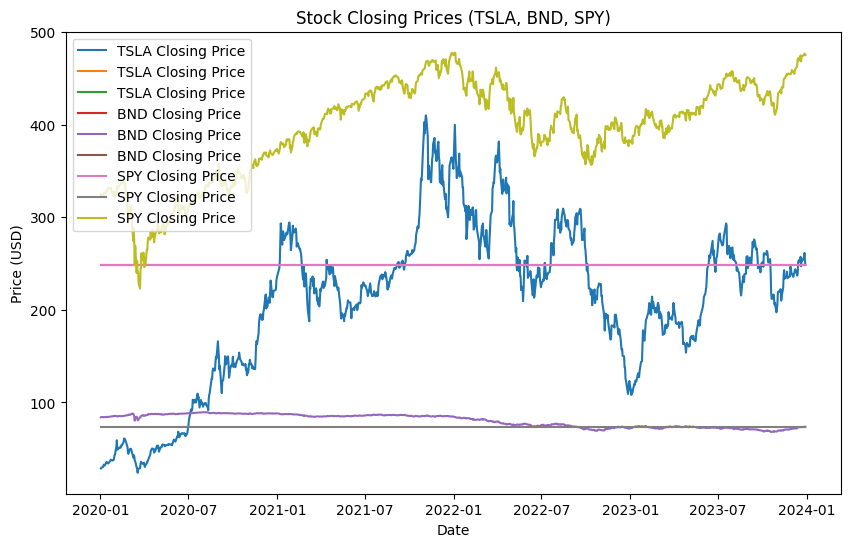

In [4]:
# Plotting the closing price for each stock
def plot_closing_prices(df):
    """Function to plot the closing price of the stocks."""
    plt.figure(figsize=(10,6))
    for ticker in df['Ticker'].unique():
        stock = df[df['Ticker'] == ticker]
        plt.plot(stock['Date'], stock['Close'], label=f'{ticker} Closing Price')
    plt.title('Stock Closing Prices (TSLA, BND, SPY)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Visualize closing prices
plot_closing_prices(cleaned_data)
